<a href="https://colab.research.google.com/github/thiagoteles10/analise-de-dados-financeiros-da-binance/blob/main/an%C3%A1lise_de_relat%C3%B3rio_financeiro_da_binance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('extrato binance.csv')

In [5]:
df.head()

,User_ID,UTC_Time,Account,Operation,Coin,Change,Remark
0,427629355,2022-06-03 19:13:49,SPOT,Deposit,BRL,201.5000,NaN
1,427629355,2022-06-10 00:22:25,SPOT,Deposit,BRL,100.0000,NaN
2,427629355,2022-06-10 14:37:11,SPOT,Transaction Spend,BRL,-301.3280,NaN
3,427629355,2022-06-10 14:37:11,SPOT,Transaction Buy,ADA,101.8000,NaN
4,427629355,2022-06-10 14:37:11,SPOT,Fee,ADA,-0.1018,NaN


In [6]:
# Converter a coluna "UC_Time" para o formato de data
df['UTC_Time'] = pd.to_datetime(df['UTC_Time'])

# Extrair apenas o mês e o ano da coluna "UC_Time"
df['UTC_Time'] = df['UTC_Time'].dt.strftime('%Y-%m')

df['UTC_Time'] = pd.to_datetime(df['UTC_Time'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   User_ID    1272 non-null   int64         
 1   UTC_Time   1272 non-null   datetime64[ns]
 2   Account    1272 non-null   object        
 3   Operation  1272 non-null   object        
 4   Coin       1272 non-null   object        
 5   Change     1272 non-null   float64       
 6   Remark     9 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 69.7+ KB


In [8]:
# Criar uma nova coluna "Month" com o mês correspondente
df['Month'] = df['UTC_Time'].dt.month

# Contar o número de depósitos em cada mês
meses_deposito = df.loc[df['Operation'] == 'Deposit', 'Month'].value_counts()

# Obter o mês com o maior número de depósitos
mes_mais_depositos = meses_deposito.idxmax()

print(mes_mais_depositos)

8


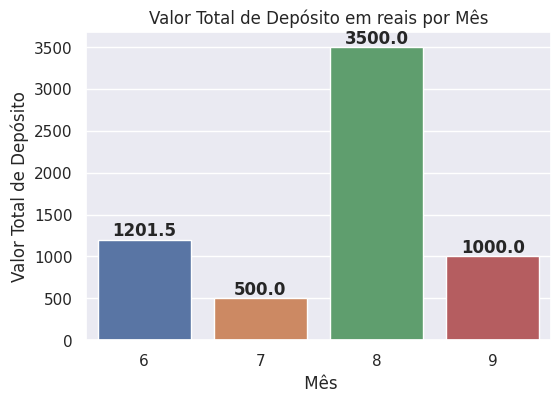

In [9]:
# mostrando os valor investido por mês durante o ano de 2022

# Filtrar os registros de depósito e calcular o valor total de depósito para cada mês
depositos_por_mes = df[df['Operation'] == 'Deposit'].groupby('Month')['Change'].sum()

# Configurar o estilo do gráfico
sns.set(style='darkgrid')

# Plotar o gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=depositos_por_mes.index, y=depositos_por_mes.values)
plt.xlabel(' Mês')
plt.ylabel('Valor Total de Depósito')
plt.title('Valor Total de Depósito em reais por Mês')

# Adicionar os valores em cima de cada barra
for i, v in enumerate(depositos_por_mes.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.show()

In [11]:
# Excluido a coluna User_ID e Remark pois são irrelevantes
df = df.drop(['User_ID','Remark'],axis=1)

In [12]:
# verificando o valor comprado em dólar durante o ano de 2022
usdt = df[(df['Operation'] == 'Transaction Buy') & (df['Coin'] == 'USDT')]

print(f'o valor comprado de USDT durante o ano de 2022 foi $ {usdt.Change.sum()} dólares')

o valor comprado de USDT durante o ano de 2022 foi $ 983.5 dólares


In [13]:
# verificando os tipos de operaçõesda coluna operation
df['Operation'].unique()

array(['Deposit', 'Transaction Spend', 'Transaction Buy', 'Fee',
       'Cashback Voucher', 'Transaction Sold', 'Transaction Revenue',
       'Transfer Between Spot Account and UM Futures Account',
       'Realize profit and loss', 'Funding Fee',
       'Insurance Fund Compensation', 'Cash Voucher Distribution',
       'Staking Purchase', 'Staking Rewards', 'Distribution',
       'Simple Earn Locked Rewards', 'Simple Earn Locked Redemption',
       'Withdraw'], dtype=object)

In [14]:
# Filtrar as linhas com a operação "Deposit" e verificando o valor investido em reais
brl = df[(df['Operation'] == 'Deposit') & (df['Coin'] == 'BRL')]

print(f'o valor investido no ano de 2022 em real foi de R$ {brl.Change.sum()}')

o valor investido no ano de 2022 em real foi de R$ 6201.5


In [15]:
# Calculando o valor total de taxas pagas durante o ano de 2022
df_taxas = df[df['Operation']== 'Fee']
taxas = df_taxas['Change'].sum()
print(f'o valor total de taxas pago $ {taxas} dólares')

o valor total de taxas pago $ -25.401186029999998 dólares


In [16]:
# calculando os ganhos simples de recompensas bloqueadas
df_ganhos = df[df['Operation']=='Simple Earn Locked Rewards']
ganhos_recompensas = df_ganhos['Change'].sum()
print(f'o total de recompensas foi de $ {ganhos_recompensas} dólares')

o total de recompensas foi de $ 88.86710248 dólares


In [17]:
# calculando as recompensas de staking
df_stake = df[df['Operation']== 'Staking Rewards']
ganhos_stake = df_stake['Change'].sum()
print(f'o total de ganhos de staking foi de $ {ganhos_stake} dólares')

o total de ganhos de staking foi de $ 65.69046150000001 dólares


In [18]:
# calculando o total de perdas e lucros nos futuros
df_lucro_perda = df[df['Operation']== 'Realize profit and loss']
lucro_perda = df_lucro_perda['Change'].sum()
print(f'a soma total ganhos e perdas nos futuros foi de $ {lucro_perda} dólares')

a soma total ganhos e perdas nos futuros foi de $ -56.147759969999996 dólares


In [19]:
# gastos com compensação do fundo de seguro
df_insurance_funding_fee = df[df['Operation']=='Insurance Fund Compensation']
funding_insurance_fee = df_insurance_funding_fee['Change'].sum()
print(f'total de taxas de compensação de fundos de seguro foi de  $ {funding_insurance_fee} dólares')

total de taxas de compensação de fundos de seguro foi de  $ -4.65115621 dólares


In [20]:
# Verificando as moedas que foram sacadas para carteira e a quantidade de cada moeda.
sacadas = df[df['Operation']== 'Withdraw']
qtd = sacadas.Change.reset_index() 
coin = sacadas.Coin.reset_index()
merged_coin = pd.merge(coin, qtd, on='index')
merged_coin = merged_coin.drop('index',axis=1)
merged_coin

,Coin,Change
0,LINK,-27.238830
1,MATIC,-216.314324
2,UNI,-10.830620
3,ADA,-104.561665
4,ROSE,-1.000000
5,ROSE,-3284.000000
6,DOT,-24.012840
7,ACA,-1.000000
8,ACA,-602.789440
